Presentado por: Diego Quisi

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [1]:

import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 10 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 3
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(random.randint(TIEMPO_LAVADO-5, TIEMPO_LAVADO+5))
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

       
        tiempo[nombre]=env.now
        
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


print("Diccionario timepo :")
print(tiempo)

Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-6 a la hora 6.00.
Removido  {81%} suciedad vehiculo => Vehiculo-1 
Removido  {42%} suciedad vehiculo => Vehiculo-2 
Removido  {45%} suciedad vehiculo => Vehiculo-3 
Llega vehiculo: Vehiculo-7 a la hora 12.00.
Vehiculo [Vehiculo-1] lavado a las 12.00.
Vehiculo [Vehiculo-2] lavado a las 12.00.
Vehiculo [Vehiculo-3] lavado a las 12.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 12.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 12.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 12.00.
Llega vehiculo: Vehiculo-8 a la hora 16.00.
Llega vehiculo: Vehiculo-9 a la hora 16.00.
L

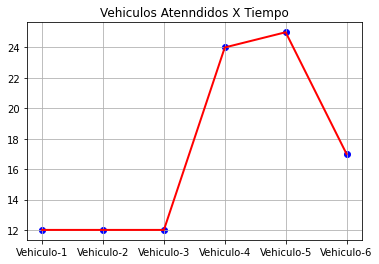

In [2]:
# Generamos la grafica
datos=sorted(tiempo.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Vehiculos Atenndidos X Tiempo")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
Removido  {32%} suciedad vehiculo => Automovil-1 
Vehiculo [Automovil-1] lavado a las 8.00.
Se traslada vehiculo: Bus-2 a la hora 8.00.
Llega vehiculo: Furgoneta-3 a la hora 12.00.
Entra vehiculo a lavarse: Bus-2 a la hora 12.00.
Removido  {88%} suciedad vehiculo => Furgoneta-1 
Vehiculo [Furgoneta-1] lavado a las 14.00.
Se traslada vehiculo: Automovil-2 a la hora 14.00.
Entra vehiculo a lavarse: Automovil-2 a la hora 15.00.
Lleg

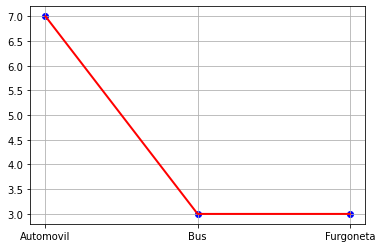

In [3]:
# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 10
# Tiempo de simulación
TIEMPO_SIMULACION = 100

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
        #Solo agregamos al diccionario al momento que termina de lavar el vehiculo.
        k=automotor[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(2):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportun

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.

Finalmente generar las simulaciones para el pico de atencion de R0 calculado y R0 predecido la siguiente semana.
- infectados actual 390
- Media provincia Los Rios 145.5
- Mediana provincia Los Rios 150.28
- R0=3.316

Simulacion COVID 19
Llega nuevo paciente  :  0  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  1  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  2  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  3  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  4  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  5  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  6  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  7  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  8  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  9  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  10  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  11  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  12  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  13  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  14  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  15  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  16  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  17  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  18  tipo:  1  en tiempo: 0
Ll

Llega nuevo paciente  :  313  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  314  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  315  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  316  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  317  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  318  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  319  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  320  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  321  tipo:  4  en tiempo: 0
Llega nuevo paciente  :  322  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  323  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  324  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  325  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  326  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  327  tipo:  2  en tiempo: 0
Llega nuevo paciente  :  328  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  329  tipo:  3  en tiempo: 0
Llega nuevo paciente  :  330  tipo:  1  en tiempo: 0
Llega nuevo paciente  :  331  tipo:  1  en tie

consultorio disponible en el hospital  A
El paciente  98 de tipo adulto  fue atendido en :  0.5246942453621131   en el hospital   B
	 ee Al paciente:  98  se le asigna una CAMA   hospital  B
consultorio disponible en el hospital  B
El paciente  176 de tipo niño  fue atendido en :  0.5323890487538181   en el hospital   A
	 El paciente  176 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  101 de tipo adulto mayor  fue atendido en :  0.5331473369041763   en el hospital   B
	 El paciente  101 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  172 de tipo adulto  fue atendido en :  0.5364176580840889   en el hospital   A
	 ee Al paciente:  172  se le asigna una CAMA   hospital  A
consultorio disponible en el hospital  A
El paciente  102 de tipo niño  fue atendido en :  0.5379574893365596   en el hospital   B
	 ee Al paciente:  102  se le asigna una CAMA   hospital  B
consultorio disponible en el hospital  B
El paciente  178 de tipo adulto mayor  fue a

El paciente  306 de tipo adolecente  fue atendido en :  0.9459510355307694   en el hospital   A
	 ee Al paciente:  306  se le asigna una CAMA   hospital  A
consultorio disponible en el hospital  A
El paciente  307 de tipo adulto mayor  fue atendido en :  0.9499774431573583   en el hospital   A
	 ee Al paciente:  307  se le asigna una CAMA   hospital  A
consultorio disponible en el hospital  A
El paciente  311 de tipo adulto mayor  fue atendido en :  0.9600995608287828   en el hospital   A
	 ee Al paciente:  311  se le asigna una CAMA   hospital  A
consultorio disponible en el hospital  A
El paciente  194 de tipo adulto mayor  fue atendido en :  0.962516831786422   en el hospital   B
	 El paciente  194 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  310 de tipo adolecente  fue atendido en :  0.9646665927103015   en el hospital   A
	 ee Al paciente:  310  se le asigna una CAMA   hospital  A
consultorio disponible en el hospital  A
El paciente  308 de tipo adolecente

	 ee Al paciente:  397  se le asigna una CAMA   hospital  A
consultorio disponible en el hospital  A
El paciente  324 de tipo adulto  fue atendido en :  1.034870392248315   en el hospital   A
	 El paciente  324 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  393 de tipo adolecente  fue atendido en :  0.03536181470926758   en el hospital   A
	 ee Al paciente:  393  se le asigna una CAMA   hospital  A
consultorio disponible en el hospital  A
El paciente  392 de tipo adulto mayor  fue atendido en :  0.045734975455885785   en el hospital   B
	 ee Al paciente:  392  se le asigna una CAMA   hospital  B
consultorio disponible en el hospital  B
El paciente  391 de tipo adolecente  fue atendido en :  0.04709281365844875   en el hospital   B
	 ee Al paciente:  391  se le asigna una CAMA   hospital  B
consultorio disponible en el hospital  B
El paciente  398 de tipo niño  fue atendido en :  0.0520341967886897   en el hospital   A
	 El paciente  398 no tiene COVID.
consultori

El paciente  535 de tipo niño  fue atendido en :  0.63067409545627   en el hospital   B
El paciente  534 de tipo niño  fue atendido en :  0.6339119967444613   en el hospital   B
	 El paciente  534 no tiene COVID.
siguente dia 2
Llega nuevo paciente  :  536  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  537  tipo:  4  en tiempo: 2
Llega nuevo paciente  :  538  tipo:  1  en tiempo: 2
Llega nuevo paciente  :  539  tipo:  4  en tiempo: 2
Llega nuevo paciente  :  540  tipo:  4  en tiempo: 2
Llega nuevo paciente  :  541  tipo:  1  en tiempo: 2
Llega nuevo paciente  :  542  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  543  tipo:  3  en tiempo: 2
Llega nuevo paciente  :  544  tipo:  2  en tiempo: 2
Llega nuevo paciente  :  545  tipo:  4  en tiempo: 2
Llega nuevo paciente  :  546  tipo:  1  en tiempo: 2
Llega nuevo paciente  :  547  tipo:  4  en tiempo: 2
Llega nuevo paciente  :  548  tipo:  4  en tiempo: 2
Llega nuevo paciente  :  549  tipo:  1  en tiempo: 2
Llega nuevo paciente  :  550  

El paciente  648 de tipo niño  fue atendido en :  0.3241785390783565   en el hospital   A
	 El paciente  648 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  652 de tipo niño  fue atendido en :  0.33269295727784653   en el hospital   A
consultorio disponible en el hospital  A
El paciente  595 de tipo adulto  fue atendido en :  0.33439514469255904   en el hospital   B
consultorio disponible en el hospital  B
	 ew El paciente  483  en el hospital  A  espero  1.335749361295374  dias y fallece no hay camas
El paciente  649 de tipo adolecente  fue atendido en :  0.3373168745328874   en el hospital   A
	 El paciente  649 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  597 de tipo adulto mayor  fue atendido en :  0.3460797302884515   en el hospital   B
	 El paciente  597 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  650 de tipo adolecente  fue atendido en :  0.34664876445627435   en el hospital   A
	 El paciente  650 no tiene 

	 ew El paciente  424  en el hospital  B  espero  2.1699316990018724  dias y fallece no hay camas
El paciente  733 de tipo niño  fue atendido en :  0.17104404475310364   en el hospital   A
consultorio disponible en el hospital  A
El paciente  732 de tipo adolecente  fue atendido en :  0.17717436616969673   en el hospital   A
consultorio disponible en el hospital  A
El paciente  717 de tipo adulto mayor  fue atendido en :  0.18321495382559894   en el hospital   B
consultorio disponible en el hospital  B
El paciente  734 de tipo adulto  fue atendido en :  0.18361096486459072   en el hospital   A
consultorio disponible en el hospital  A
El paciente  736 de tipo adulto  fue atendido en :  0.18655727913677556   en el hospital   A
consultorio disponible en el hospital  A
El paciente  714 de tipo adolecente  fue atendido en :  0.1901674203437147   en el hospital   B
	 El paciente  714 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  711 de tipo adulto  fue atendido en :  

Llega nuevo paciente  :  901  tipo:  3  en tiempo: 4
Llega nuevo paciente  :  902  tipo:  1  en tiempo: 4
Llega nuevo paciente  :  903  tipo:  4  en tiempo: 4
Llega nuevo paciente  :  904  tipo:  1  en tiempo: 4
Llega nuevo paciente  :  905  tipo:  3  en tiempo: 4
Llega nuevo paciente  :  906  tipo:  3  en tiempo: 4
Llega nuevo paciente  :  907  tipo:  3  en tiempo: 4
Llega nuevo paciente  :  908  tipo:  1  en tiempo: 4
Llega nuevo paciente  :  909  tipo:  3  en tiempo: 4
Llega nuevo paciente  :  910  tipo:  4  en tiempo: 4
Llega nuevo paciente  :  911  tipo:  1  en tiempo: 4
Llega nuevo paciente  :  912  tipo:  1  en tiempo: 4
Llega nuevo paciente  :  913  tipo:  4  en tiempo: 4
Llega nuevo paciente  :  914  tipo:  4  en tiempo: 4
Llega nuevo paciente  :  915  tipo:  1  en tiempo: 4
Llega nuevo paciente  :  916  tipo:  3  en tiempo: 4
Llega nuevo paciente  :  917  tipo:  2  en tiempo: 4
Llega nuevo paciente  :  918  tipo:  1  en tiempo: 4
Llega nuevo paciente  :  919  tipo:  2  en tie

	 ew El paciente  778  en el hospital  A  espero  1.304684814478164  dias y fallece no hay camas
El paciente  926 de tipo adolecente  fue atendido en :  0.3105000291816262   en el hospital   A
	 El paciente  926 no tiene COVID.
consultorio disponible en el hospital  A
	 ew El paciente  643  en el hospital  A  espero  2.311960583698511  dias y fallece no hay camas
El paciente  933 de tipo adulto mayor  fue atendido en :  0.3154020666249506   en el hospital   A
consultorio disponible en el hospital  A
El paciente  890 de tipo adulto mayor  fue atendido en :  0.31547079764334196   en el hospital   B
	 El paciente  890 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  645  en el hospital  A  espero  2.3155720786229246  dias y fallece no hay camas
El paciente  929 de tipo niño  fue atendido en :  0.3161849930382159   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  647  en el hospital  A  espero  2.3168129669458235  dias y fallece no hay

Llega nuevo paciente  :  1091  tipo:  2  en tiempo: 5
Llega nuevo paciente  :  1092  tipo:  2  en tiempo: 5
Llega nuevo paciente  :  1093  tipo:  1  en tiempo: 5
Llega nuevo paciente  :  1094  tipo:  4  en tiempo: 5
Llega nuevo paciente  :  1095  tipo:  3  en tiempo: 5
Llega nuevo paciente  :  1096  tipo:  2  en tiempo: 5
Llega nuevo paciente  :  1097  tipo:  3  en tiempo: 5
Llega nuevo paciente  :  1098  tipo:  4  en tiempo: 5
Llega nuevo paciente  :  1099  tipo:  3  en tiempo: 5
Llega nuevo paciente  :  1100  tipo:  2  en tiempo: 5
Llega nuevo paciente  :  1101  tipo:  1  en tiempo: 5
Llega nuevo paciente  :  1102  tipo:  4  en tiempo: 5
Llega nuevo paciente  :  1103  tipo:  3  en tiempo: 5
Llega nuevo paciente  :  1104  tipo:  1  en tiempo: 5
Llega nuevo paciente  :  1105  tipo:  3  en tiempo: 5
Llega nuevo paciente  :  1106  tipo:  2  en tiempo: 5
Llega nuevo paciente  :  1107  tipo:  4  en tiempo: 5
Llega nuevo paciente  :  1108  tipo:  1  en tiempo: 5
Llega nuevo paciente  :  110

El paciente  1100 de tipo adolecente  fue atendido en :  0.40219443883506045   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  802  en el hospital  A  espero  2.40448136010888  dias y fallece no hay camas
El paciente  1042 de tipo niño  fue atendido en :  0.40635194738994596   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1104 de tipo niño  fue atendido en :  0.406401465103456   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1099 de tipo adulto  fue atendido en :  0.4101967822250341   en el hospital   A
	 El paciente  1099 no tiene COVID.
consultorio disponible en el hospital  A
	 ew El paciente  605  en el hospital  B  espero  3.4114263223234227  dias y fallece no hay camas
	 ew El paciente  667  en el hospital  A  espero  3.411816445366494  dias y fallece no hay camas
	 ew El paciente  808  en el hospital  A  espero  2.415304408789571  dias y fallece no hay camas
El paciente  1041 de tipo adulto  fue a

El paciente  1121 de tipo adulto mayor  fue atendido en :  0.022631619943816794   en el hospital   B
	 El paciente  1121 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  1118 de tipo adulto mayor  fue atendido en :  0.026438815871336452   en el hospital   A
	 El paciente  1118 no tiene COVID.
consultorio disponible en el hospital  A
El paciente se termino de atender:  397  tiempo de salida:  6.030415030583966  hospital  A
	 ee Al paciente:  517  se le asigna una CAMA   hospital  A
	 ew El paciente  831  en el hospital  B  espero  2.030702044535805  dias y fallece no hay camas
El paciente  1119 de tipo adulto  fue atendido en :  0.0318591511949089   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  827  en el hospital  A  espero  2.0368113152275074  dias y fallece no hay camas
	 ew El paciente  971  en el hospital  B  espero  1.039689226254854  dias y fallece no hay camas
El paciente  1122 de tipo adulto mayor  fue atendido en :  0.043395

El paciente  1235 de tipo adolecente  fue atendido en :  0.569422981410467   en el hospital   B
	 El paciente  1235 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  1240 de tipo niño  fue atendido en :  0.5721568232946543   en el hospital   B
	 El paciente  1240 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  638  en el hospital  B  espero  4.587191400742686  dias y fallece no hay camas
El paciente se termino de atender:  189  tiempo de salida:  6.588682787817016  hospital  A
	 ee Al paciente:  689  se le asigna una CAMA   hospital  A
El paciente  1243 de tipo adulto  fue atendido en :  0.598028315404072   en el hospital   B
	 El paciente  1243 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  1252 de tipo adulto  fue atendido en :  0.6097152744684227   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1250 de tipo adulto  fue atendido en :  0.6136956054778189   en el hospital   B
	 El paciente  

El paciente  1359 de tipo niño  fue atendido en :  0.33428450818115163   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  783  en el hospital  A  espero  4.334395239697164  dias y fallece no hay camas
El paciente  1364 de tipo adulto mayor  fue atendido en :  0.33931900554012184   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1338 de tipo niño  fue atendido en :  0.3463328270329251   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1367 de tipo adolecente  fue atendido en :  0.34828058347371194   en el hospital   A
	 El paciente  1367 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  1372 de tipo niño  fue atendido en :  0.34892701264684334   en el hospital   A
	 El paciente  1372 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  1339 de tipo adulto mayor  fue atendido en :  0.3551249287414313   en el hospital   B
consultorio disponible en el hospital  B
El paciente s

Llega nuevo paciente  :  1501  tipo:  3  en tiempo: 8
Llega nuevo paciente  :  1502  tipo:  2  en tiempo: 8
Llega nuevo paciente  :  1503  tipo:  2  en tiempo: 8
Llega nuevo paciente  :  1504  tipo:  4  en tiempo: 8
Llega nuevo paciente  :  1505  tipo:  3  en tiempo: 8
Llega nuevo paciente  :  1506  tipo:  1  en tiempo: 8
Llega nuevo paciente  :  1507  tipo:  1  en tiempo: 8
Llega nuevo paciente  :  1508  tipo:  1  en tiempo: 8
Llega nuevo paciente  :  1509  tipo:  3  en tiempo: 8
Llega nuevo paciente  :  1510  tipo:  2  en tiempo: 8
Llega nuevo paciente  :  1511  tipo:  1  en tiempo: 8
Llega nuevo paciente  :  1512  tipo:  4  en tiempo: 8
Llega nuevo paciente  :  1513  tipo:  2  en tiempo: 8
Llega nuevo paciente  :  1514  tipo:  3  en tiempo: 8
Llega nuevo paciente  :  1515  tipo:  2  en tiempo: 8
Llega nuevo paciente  :  1516  tipo:  1  en tiempo: 8
Llega nuevo paciente  :  1517  tipo:  4  en tiempo: 8
Llega nuevo paciente  :  1518  tipo:  3  en tiempo: 8
Llega nuevo paciente  :  151

	 El paciente  1537 no tiene COVID.
	 ew El paciente  914  en el hospital  B  espero  4.447201746662451  dias y fallece no hay camas
El paciente  1498 de tipo niño  fue atendido en :  0.4478992503485397   en el hospital   B
consultorio disponible en el hospital  B
	 ew El paciente  1253  en el hospital  A  espero  2.448804947217255  dias y fallece no hay camas
	 ew El paciente  1052  en el hospital  B  espero  3.4489352967320173  dias y fallece no hay camas
El paciente  1547 de tipo adulto  fue atendido en :  0.4519017718727927   en el hospital   A
El paciente  1540 de tipo adulto  fue atendido en :  0.4552270189667844   en el hospital   A
	 El paciente  1540 no tiene COVID.
El paciente  1506 de tipo niño  fue atendido en :  0.46039842289019184   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1499 de tipo adulto mayor  fue atendido en :  0.46487473797938783   en el hospital   B
consultorio disponible en el hospital  B
El paciente se termino de atender:  156  t

	 ew El paciente  1450  en el hospital  A  espero  1.1524608469965258  dias y fallece no hay camas
El paciente  1578 de tipo adulto mayor  fue atendido en :  0.15461766130486332   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1624 de tipo adulto mayor  fue atendido en :  0.15616340770189652   en el hospital   A
	 El paciente  1624 no tiene COVID.
consultorio disponible en el hospital  A
El paciente se termino de atender:  34  tiempo de salida:  9.157095563683484  hospital  B
	 ee Al paciente:  970  se le asigna una CAMA   hospital  B
El paciente  1584 de tipo niño  fue atendido en :  0.16325027426261407   en el hospital   B
	 El paciente  1584 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  1171  en el hospital  A  espero  3.168440894837593  dias y fallece no hay camas
El paciente  1626 de tipo adolecente  fue atendido en :  0.16928570441617552   en el hospital   A
	 El paciente  1626 no tiene COVID.
consultorio disponible en el hos

El paciente se termino de atender:  393  tiempo de salida:  10.035361814709267  hospital  A
	 ee Al paciente:  1181  se le asigna una CAMA   hospital  A
El paciente  1703 de tipo niño  fue atendido en :  0.036300603894993344   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  1412  en el hospital  B  espero  2.0437814756814934  dias y fallece no hay camas
El paciente  1700 de tipo adulto  fue atendido en :  0.04890721111958207   en el hospital   A
	 El paciente  1700 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  1705 de tipo adulto mayor  fue atendido en :  0.04941599381481332   en el hospital   A
	 El paciente  1705 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  1709 de tipo adulto mayor  fue atendido en :  0.05387195984302018   en el hospital   A
	 El paciente  1709 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  1708 de tipo adulto mayor  fue atendido en :  0.05544284916554254   en el ho

	 ee Al paciente:  1186  se le asigna una CAMA   hospital  B
siguente dia 11
Llega nuevo paciente  :  1841  tipo:  3  en tiempo: 11
Llega nuevo paciente  :  1842  tipo:  2  en tiempo: 11
Llega nuevo paciente  :  1843  tipo:  1  en tiempo: 11
Llega nuevo paciente  :  1844  tipo:  4  en tiempo: 11
Llega nuevo paciente  :  1845  tipo:  4  en tiempo: 11
Llega nuevo paciente  :  1846  tipo:  1  en tiempo: 11
Llega nuevo paciente  :  1847  tipo:  3  en tiempo: 11
Llega nuevo paciente  :  1848  tipo:  1  en tiempo: 11
Llega nuevo paciente  :  1849  tipo:  2  en tiempo: 11
Llega nuevo paciente  :  1850  tipo:  1  en tiempo: 11
Llega nuevo paciente  :  1851  tipo:  4  en tiempo: 11
Llega nuevo paciente  :  1852  tipo:  2  en tiempo: 11
Llega nuevo paciente  :  1853  tipo:  3  en tiempo: 11
Llega nuevo paciente  :  1854  tipo:  1  en tiempo: 11
Llega nuevo paciente  :  1855  tipo:  2  en tiempo: 11
Llega nuevo paciente  :  1856  tipo:  4  en tiempo: 11
Llega nuevo paciente  :  1857  tipo:  1  en

	 ew El paciente  1321  en el hospital  B  espero  4.303361946344722  dias y fallece no hay camas
El paciente  1907 de tipo adolecente  fue atendido en :  0.30363474858146766   en el hospital   B
consultorio disponible en el hospital  B
El paciente  1919 de tipo adulto  fue atendido en :  0.30533569525024085   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  1799  en el hospital  A  espero  1.3101261089423257  dias y fallece no hay camas
	 ew El paciente  1461  en el hospital  B  espero  3.3106823743442018  dias y fallece no hay camas
	 ew El paciente  1500  en el hospital  A  espero  3.311027847561011  dias y fallece no hay camas
El paciente  1926 de tipo adolecente  fue atendido en :  0.31108909871918655   en el hospital   A
	 El paciente  1926 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  1927 de tipo niño  fue atendido en :  0.31398950410834736   en el hospital   A
consultorio disponible en el hospital  A
El paciente  1910 de tip

Llega nuevo paciente  :  2113  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2114  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2115  tipo:  1  en tiempo: 12
Llega nuevo paciente  :  2116  tipo:  1  en tiempo: 12
Llega nuevo paciente  :  2117  tipo:  1  en tiempo: 12
Llega nuevo paciente  :  2118  tipo:  3  en tiempo: 12
Llega nuevo paciente  :  2119  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2120  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2121  tipo:  3  en tiempo: 12
Llega nuevo paciente  :  2122  tipo:  2  en tiempo: 12
Llega nuevo paciente  :  2123  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2124  tipo:  3  en tiempo: 12
Llega nuevo paciente  :  2125  tipo:  2  en tiempo: 12
Llega nuevo paciente  :  2126  tipo:  2  en tiempo: 12
Llega nuevo paciente  :  2127  tipo:  2  en tiempo: 12
Llega nuevo paciente  :  2128  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2129  tipo:  4  en tiempo: 12
Llega nuevo paciente  :  2130  tipo:  4  en tiempo: 12
consultori

	 ee Al paciente:  1452  se le asigna una CAMA   hospital  B
El paciente se termino de atender:  688  tiempo de salida:  12.86039202085965  hospital  A
	 ee Al paciente:  1574  se le asigna una CAMA   hospital  A
El paciente se termino de atender:  713  tiempo de salida:  12.89709146740224  hospital  A
	 ee Al paciente:  1582  se le asigna una CAMA   hospital  A
El paciente se termino de atender:  180  tiempo de salida:  12.902398569136889  hospital  B
	 ee Al paciente:  1471  se le asigna una CAMA   hospital  B
El paciente se termino de atender:  311  tiempo de salida:  12.960099560828782  hospital  A
	 ee Al paciente:  1581  se le asigna una CAMA   hospital  A
El paciente se termino de atender:  321  tiempo de salida:  12.98397061747217  hospital  A
	 ee Al paciente:  1606  se le asigna una CAMA   hospital  A
siguente dia 13
Llega nuevo paciente  :  2131  tipo:  4  en tiempo: 13
Llega nuevo paciente  :  2132  tipo:  3  en tiempo: 13
Llega nuevo paciente  :  2133  tipo:  4  en tiempo:

	 ew El paciente  1873  en el hospital  B  espero  2.1668329951830607  dias y fallece no hay camas
El paciente se termino de atender:  36  tiempo de salida:  13.168638656864768  hospital  B
	 ee Al paciente:  1514  se le asigna una CAMA   hospital  B
	 ew El paciente  1753  en el hospital  A  espero  3.169319945096765  dias y fallece no hay camas
El paciente  2180 de tipo adolecente  fue atendido en :  0.16942751672739753   en el hospital   A
	 El paciente  2180 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2166 de tipo adulto mayor  fue atendido en :  0.17446060054990653   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2188 de tipo niño  fue atendido en :  0.17783253329045046   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2183 de tipo adolecente  fue atendido en :  0.17788572863404895   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2173 de tipo adulto mayor  fue atendido en :  0.18

Llega nuevo paciente  :  2363  tipo:  3  en tiempo: 14
Llega nuevo paciente  :  2364  tipo:  4  en tiempo: 14
Llega nuevo paciente  :  2365  tipo:  3  en tiempo: 14
Llega nuevo paciente  :  2366  tipo:  4  en tiempo: 14
Llega nuevo paciente  :  2367  tipo:  2  en tiempo: 14
Llega nuevo paciente  :  2368  tipo:  1  en tiempo: 14
Llega nuevo paciente  :  2369  tipo:  1  en tiempo: 14
Llega nuevo paciente  :  2370  tipo:  1  en tiempo: 14
Llega nuevo paciente  :  2371  tipo:  1  en tiempo: 14
Llega nuevo paciente  :  2372  tipo:  4  en tiempo: 14
Llega nuevo paciente  :  2373  tipo:  4  en tiempo: 14
Llega nuevo paciente  :  2374  tipo:  4  en tiempo: 14
Llega nuevo paciente  :  2375  tipo:  3  en tiempo: 14
Llega nuevo paciente  :  2376  tipo:  4  en tiempo: 14
Llega nuevo paciente  :  2377  tipo:  3  en tiempo: 14
Llega nuevo paciente  :  2378  tipo:  1  en tiempo: 14
Llega nuevo paciente  :  2379  tipo:  2  en tiempo: 14
Llega nuevo paciente  :  2380  tipo:  2  en tiempo: 14
Llega nuev

	 ew El paciente  1931  en el hospital  B  espero  3.4579688672794155  dias y fallece no hay camas
El paciente  2402 de tipo adulto  fue atendido en :  0.45810894169703076   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2405 de tipo adolecente  fue atendido en :  0.45902149345890564   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2407 de tipo adulto  fue atendido en :  0.46011488309427406   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2382 de tipo adulto mayor  fue atendido en :  0.4646447943664427   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2410 de tipo adulto mayor  fue atendido en :  0.47647375480330467   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2412 de tipo niño  fue atendido en :  0.47694297944884134   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  2081  en el hospital  B  espero  2.4789481991461617  dias y 

El paciente  2440 de tipo niño  fue atendido en :  0.08538940900620773   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2439 de tipo adolecente  fue atendido en :  0.08648824426629709   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2437 de tipo adolecente  fue atendido en :  0.08809781728826493   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2446 de tipo adulto mayor  fue atendido en :  0.0922859909384357   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2443 de tipo adolecente  fue atendido en :  0.09950043389509666   en el hospital   A
	 El paciente  2443 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2441 de tipo adulto  fue atendido en :  0.10153753890683781   en el hospital   A
	 El paciente  2441 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2449 de tipo adulto mayor  fue atendido en :  0.10362084438754415   en el hospital   B
con

	 El paciente  2545 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2548 de tipo adulto mayor  fue atendido en :  0.4607899712644983   en el hospital   A
	 El paciente  2548 no tiene COVID.
consultorio disponible en el hospital  A
El paciente se termino de atender:  622  tiempo de salida:  15.468681691890469  hospital  B
	 ee Al paciente:  1892  se le asigna una CAMA   hospital  B
El paciente  2552 de tipo niño  fue atendido en :  0.4714093654913647   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2528 de tipo adulto mayor  fue atendido en :  0.4752939750038827   en el hospital   B
	 El paciente  2528 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  2410  en el hospital  A  espero  1.4764737548033047  dias y fallece no hay camas
El paciente  2533 de tipo adolecente  fue atendido en :  0.48257786877788433   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2554 de tipo adolecente  fue atendi

El paciente  2588 de tipo niño  fue atendido en :  0.06859413916640378   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2581 de tipo niño  fue atendido en :  0.07554115638220793   en el hospital   A
	 El paciente  2581 no tiene COVID.
consultorio disponible en el hospital  A
	 ew El paciente  2436  en el hospital  A  espero  1.0772670207585762  dias y fallece no hay camas
El paciente  2587 de tipo adolecente  fue atendido en :  0.07756405244339959   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2584 de tipo adulto mayor  fue atendido en :  0.07985781710163664   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2582 de tipo adolecente  fue atendido en :  0.08150809743102627   en el hospital   B
consultorio disponible en el hospital  B
El paciente  2589 de tipo niño  fue atendido en :  0.08414351627334327   en el hospital   B
	 El paciente  2589 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El pac

El paciente  2653 de tipo niño  fue atendido en :  0.464498265794802   en el hospital   B
	 El paciente  2653 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  2382  en el hospital  B  espero  2.4646447943664427  dias y fallece no hay camas
El paciente  2656 de tipo adolecente  fue atendido en :  0.46492365180633755   en el hospital   B
	 El paciente  2656 no tiene COVID.
consultorio disponible en el hospital  B
El paciente se termino de atender:  586  tiempo de salida:  16.476244966796727  hospital  A
	 ee Al paciente:  2116  se le asigna una CAMA   hospital  A
	 ew El paciente  2387  en el hospital  B  espero  2.4799349410711713  dias y fallece no hay camas
El paciente  2657 de tipo adulto  fue atendido en :  0.4973942960843942   en el hospital   B
	 El paciente  2657 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  2663 de tipo adolecente  fue atendido en :  0.49850073378820525   en el hospital   B
	 El paciente  2663 no tiene COVID.
con

	 ew El paciente  2151  en el hospital  A  espero  4.066499921643604  dias y fallece no hay camas
	 ew El paciente  2588  en el hospital  B  espero  1.0685941391664038  dias y fallece no hay camas
El paciente  2724 de tipo adulto  fue atendido en :  0.06885255992516548   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  2289  en el hospital  A  espero  3.0753736417385724  dias y fallece no hay camas
El paciente  2734 de tipo niño  fue atendido en :  0.07671412076167883   en el hospital   B
	 El paciente  2734 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  2728 de tipo adolecente  fue atendido en :  0.07716145576486255   en el hospital   B
	 El paciente  2728 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  2587  en el hospital  B  espero  1.0775640524433996  dias y fallece no hay camas
El paciente  2731 de tipo adulto mayor  fue atendido en :  0.07873121831485719   en el hospital   A
consultorio disponible en 

El paciente  2799 de tipo adulto  fue atendido en :  0.4459595355876651   en el hospital   B
	 El paciente  2799 no tiene COVID.
consultorio disponible en el hospital  B
	 ew El paciente  2378  en el hospital  B  espero  3.4460055004507666  dias y fallece no hay camas
El paciente se termino de atender:  514  tiempo de salida:  17.447684052981394  hospital  B
	 ee Al paciente:  2092  se le asigna una CAMA   hospital  B
El paciente  2847 de tipo adolecente  fue atendido en :  0.4486692173515934   en el hospital   A
consultorio disponible en el hospital  A
	 ew El paciente  2541  en el hospital  A  espero  2.451457910962503  dias y fallece no hay camas
El paciente  2848 de tipo niño  fue atendido en :  0.4535677011756931   en el hospital   A
	 El paciente  2848 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  2852 de tipo niño  fue atendido en :  0.45437019410663027   en el hospital   A
El paciente  2849 de tipo niño  fue atendido en :  0.45978693039912955   en el hos

consultorio disponible en el hospital  A
consultorio disponible en el hospital  A
consultorio disponible en el hospital  B
consultorio disponible en el hospital  B
El paciente  2862 de tipo niño  fue atendido en :  0.016314123519265422   en el hospital   B
consultorio disponible en el hospital  B
	 ew El paciente  2424  en el hospital  A  espero  3.0166430071092734  dias y fallece no hay camas
El paciente  2864 de tipo adulto mayor  fue atendido en :  0.020474941965751725   en el hospital   B
	 El paciente  2864 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  2856 de tipo niño  fue atendido en :  0.020873835691542553   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2858 de tipo adulto mayor  fue atendido en :  0.02722853886181298   en el hospital   B
	 El paciente  2858 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  2860 de tipo niño  fue atendido en :  0.029490119307574503   en el hospital   A
consultorio disponibl

	 ew El paciente  2818  en el hospital  A  espero  1.3550544771899737  dias y fallece no hay camas
El paciente  2988 de tipo adolecente  fue atendido en :  0.3566160560972129   en el hospital   A
consultorio disponible en el hospital  A
El paciente  2989 de tipo niño  fue atendido en :  0.35715864512980744   en el hospital   A
	 ew El paciente  2512  en el hospital  A  espero  3.3597521063982327  dias y fallece no hay camas
El paciente  2925 de tipo niño  fue atendido en :  0.36065159842268457   en el hospital   B
	 El paciente  2925 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  2987 de tipo adulto  fue atendido en :  0.3608400144576649   en el hospital   A
	 El paciente  2987 no tiene COVID.
El paciente  2990 de tipo niño  fue atendido en :  0.3656270716270953   en el hospital   A
El paciente  2998 de tipo niño  fue atendido en :  0.3775132766225511   en el hospital   A
	 El paciente  2998 no tiene COVID.
El paciente se termino de atender:  441  tiempo de salid

El paciente  3020 de tipo adulto  fue atendido en :  0.09465464961180103   en el hospital   A
	 El paciente  3020 no tiene COVID.
consultorio disponible en el hospital  A
El paciente  3031 de tipo adolecente  fue atendido en :  0.09689191633713179   en el hospital   B
	 El paciente  3031 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  3023 de tipo niño  fue atendido en :  0.09856477563602795   en el hospital   A
	 El paciente  3023 no tiene COVID.
consultorio disponible en el hospital  A
	 ew El paciente  2875  en el hospital  B  espero  1.099599198594472  dias y fallece no hay camas
	 ew El paciente  2738  en el hospital  A  espero  2.113210978548498  dias y fallece no hay camas
El paciente  3035 de tipo adulto mayor  fue atendido en :  0.11361360860098557   en el hospital   B
	 El paciente  3035 no tiene COVID.
consultorio disponible en el hospital  B
El paciente  3030 de tipo niño  fue atendido en :  0.11412116061204003   en el hospital   A
consultorio disponib

	 ew El paciente  2972  en el hospital  B  espero  1.655778619067359  dias y fallece no hay camas
El paciente  3138 de tipo adulto  fue atendido en :  0.6736202818870716   en el hospital   B
	 El paciente  3138 no tiene COVID.
El paciente  3144 de tipo adulto  fue atendido en :  0.7011102081164466   en el hospital   B
	 El paciente  3144 no tiene COVID.
El paciente  3145 de tipo adulto  fue atendido en :  0.703252476076635   en el hospital   B
	 ew El paciente  2697  en el hospital  B  espero  3.7112606530334844  dias y fallece no hay camas
	 ew El paciente  2985  en el hospital  B  espero  1.7407976555386568  dias y fallece no hay camas
	 ew El paciente  2996  en el hospital  B  espero  1.8110546157231902  dias y fallece no hay camas
El paciente se termino de atender:  1314  tiempo de salida:  19.83444292517289  hospital  B
	 ee Al paciente:  2463  se le asigna una CAMA   hospital  B
	 ew El paciente  3000  en el hospital  B  espero  1.8389799145264583  dias y fallece no hay camas
El 

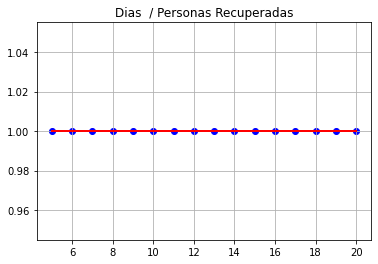

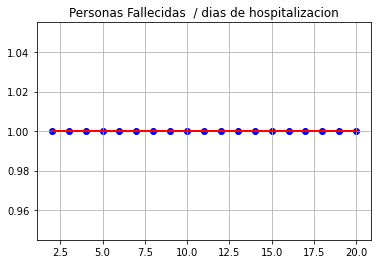

In [5]:
import simpy 
import random
import matplotlib.pyplot as pp
%matplotlib inline

#PARAMETROS
HOSPITALES=2
TASA_CRECIMIENTO=145
INFECTADOS=390
HOSPITAL_CAMA_A=106 #HOSPITAL MARTIN ICAZA 106 total ocupadas regularmente 71
HOSPITAL_CAMA_B=71 #Hospital Cantonal Sagrado Corazón de Jesús
CONSULTORIO_HOSPITAL_A=5
CONSULTORIO_HOSPITAL_B=3
DIAS_SIMULACION = 20
DIAS_INTERNADO = 10

#Diccionario para almacenar los resultados
persona_recuperadas={}
persona_fallecidas={}

personas_sin_atender=[]

class Hospital(object):
    def __init__(self,env,num_cama,name,num_consultorio):
        self.env=env
        self.num_cama=num_cama
        self.camas=simpy.Resource(env,num_cama)
        self.consultorio=simpy.Resource(env,num_consultorio)
        self.name=name
        #self.tiempo_llegada=tiempo_llegada
        
    def triaje(self,paciente,tipo,tiempo):
        print('consultorio disponible en el hospital ',self.name)
       # tiempo[paciente] = env.now
        tipo_paciente=""
        if(tipo==1):
            tipo_paciente='niño'
            #print('llega niño')
            yield self.env.timeout(random.uniform(0.015, 0.030) ) #tiempo de espera por la sala
           # tiempo_sala1.append(self.env.now-tiempo[paciente])
        elif(tipo == 2):
            tipo_paciente='adolecente'
            #print('llega adolecente')
            yield self.env.timeout(random.uniform(0.025, 0.040) )
        elif(tipo == 3):
            tipo_paciente='adulto'
            #print('llega adulto')
            yield self.env.timeout(random.uniform(0.030, 0.055) )
        else:
            tipo_paciente='adulto mayor'
            #print('llega tercera edad')
            yield self.env.timeout(random.uniform(0.015, 0.030) )
            
        print("El paciente ", paciente, 'de tipo',tipo_paciente," fue atendido en : ", self.env.now-tiempo[paciente], "  en el hospital  ", self.name)
        
    def ingresar_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("El paciente se termino de atender: ", paciente, " tiempo de salida: ", self.env.now, " hospital ", self.name)


    
    
    

def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    atencion={}
    with hospital.consultorio.request() as consultorio:
        ##tipo de paciente 
        tipo= random.randint(1,4)
        #tiempo[paciente]=env.now+(random.uniform(0.000, 1))
        tiempo[paciente] = env.now

        print("Llega nuevo paciente  : ", paciente, " tipo: ",tipo,' en tiempo:', tiempo[paciente])
        requerimiento = yield consultorio | env.timeout(1)
        if consultorio in requerimiento:
            #print("Al paciente es atendido")
            atencion[paciente]='si'
            yield env.process(hospital.triaje(paciente,tipo,tiempo))

        else:
            atencion[paciente]='no'
            
            
           
            
            
    if(atencion[paciente]=='si') :
        estado = random.randint(1,100)
        if (estado < 60):
             with hospital.camas.request() as cama:
                    dias_esperando = random.randint(1,5)
                    requerimiento = yield cama | env.timeout(dias_esperando)
                    #print('\t paciente requiere diagnostico')
                    wait = env.now - arrive
                    if cama in requerimiento:
                        print("\t ee Al paciente: ", paciente, " se le asigna una CAMA ", " hospital " , hospital.name)
                        yield env.process(hospital.ingresar_paciente(paciente))
                        estado = random.randint(1,100)
                        if (estado < 8) :
                            persona_fallecidas[round(env.now)] = persona_fallecidas[round(env.now)] + 1 if env.now in persona_fallecidas else  1
                        else:
                            persona_recuperadas[round(env.now)] = persona_recuperadas[round(env.now)] + 1 if env.now in persona_recuperadas else 1
                    else:
                        print("\t ew El paciente " , paciente, " en el hospital ", hospital.name, " espero ", wait , " dias y fallece no hay camas")
                        persona_fallecidas[round(env.now)] = persona_fallecidas[round(env.now)] + 1 if env.now in persona_fallecidas else  1    
           
        else :
            print("\t El paciente ",paciente,"no tiene COVID.")
       
    else:
        personas_sin_atender.append(paciente)
        print('paciente :',paciente,'no fue atendido en el dia')

    
def ejecutar(env, tasa_crecimiento, infectados):
    hospitalA = Hospital(env, HOSPITAL_CAMA_A, "A",CONSULTORIO_HOSPITAL_A)
    hospitalB = Hospital(env, HOSPITAL_CAMA_B, "B",CONSULTORIO_HOSPITAL_B)
    for i in range(infectados):
        asignar_hospital(env, hospitalA, hospitalB, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        print('siguente dia',env.now)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospitalA, hospitalB, paciente)

    
def asignar_hospital(env, hospitalA, hospitalB, paciente):
    hosp_esc = random.randint(1,2)

    if (hosp_esc == 1):
       
       # print("Llega paciente nuevo : ", paciente, " hospital A tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalA, paciente))
    else:
       # print("Llega paciente nuevo : ", paciente, " hospital B tiempo ", env.now)
        env.process(llegada_paciente(env, hospitalB, paciente))
        

print("Simulacion COVID 19")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS))
env.run(until=DIAS_SIMULACION)
print()

print("Resultados pacientes :")
print("Recuperados: ")
print(list(persona_recuperadas))
print("Fallecidos: ")
print(list(persona_fallecidas))

print('total pacientes sin atender',len(personas_sin_atender))


datos=sorted(persona_recuperadas.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)

pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Dias  / Personas Recuperadas")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

if (persona_fallecidas):
    datos=sorted(persona_fallecidas.items()) # Ordenamos los datos
    x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
    pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
    pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
    pp.title("Personas Fallecidas  / dias de hospitalizacion")
    pp.grid(True) #Generamos una cuadricula
    pp.show() #Mostramos el grafico



## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 